# Novelty and Outlier Detection

Outlier Detection-

This is the process of locating outliers (specimens or observations) far from the main body of observations that appear in training data,   often due to data errors
or other anomalies.   We want to find them and fit models to the main body of training data.  It is always wise to try to understand why there are outliers and fix the
issue

Novelty Detection

In this case,  the training data does not have outliers, and we want to build a system that can detect when a new observation is an outlier.   This sort of tool is useful
in fraud detection or detection of failure in machinery or other systems.  

Anomaly Detection

Both of these activities are referred to as anomally detection

See

https://scikit-learn.org/stable/modules/outlier_detection.html

Note that this is a form of "unsupervised learning" as we have no target labeling,  beyond have "typical data" to work with.

## Isolation Forests

One approach to isolating anomalies is based on randomforests.

We isolate forests by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the feature.

Strong outliers will (hopefully) be rapidly isolated,   meaning that they wind up alone on a branch.

We can calculate the number of branches it takes to isolate each particular sample.    Observations or specimens far from the main group of specimens
will be isolated quickly

If we average this over a forest of trees,   we will be able to find the specimens with particularl low average numbers of splits to isolate them

In [ ]:
## Running an Isolation forest

This is the scikit learn example

https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)


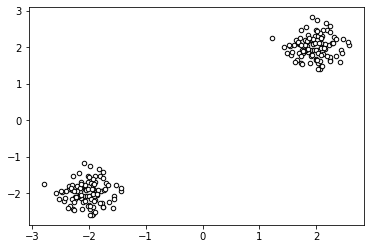

In [6]:
# Generate train data
# this is a 2D example so that it will plot nicely

X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")



In [7]:
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))


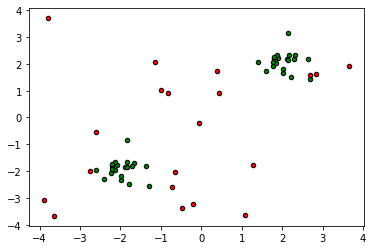

In [8]:
plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")

In [3]:
# fit the model
# the forest of 100 trees is created, and the distribution of the splitting tree lengths needed to isolate
# specimens in the test set is estimated in the fitting process
# the IsolationForest does have a contamination level setting,  which is set to the system's auto function

clf = IsolationForest(max_samples=100, random_state=rng, contamination='auto')
clf.fit(X_train)

# Now use the trained Isolation forest to code each observation as being anomalous or not
# 

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)


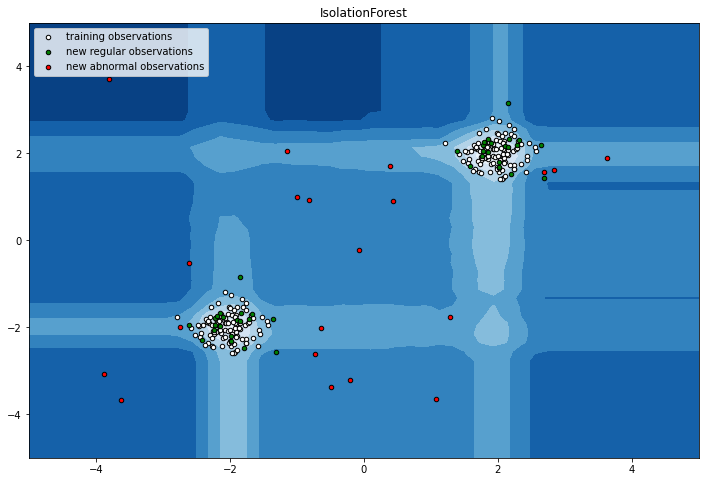

In [14]:
# plot the line, the samples, and the nearest vectors to the plane

# set up the meshgrid to plot the performance of the isolation tree
# note the use of the ravel function here on xx and yy in the meshgrid to create
# linear array versions of the grid locations

xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# set up the plot and do a contour plot of the classification behavior of the isolation forest

plt.figure(figsize=(12,8))
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# now add the test, train and isolation data to the plot

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()

In [19]:
#how well did the outlier detection work?

# percentage of training set identified as outliers

sum(y_pred_train==-1)/y_pred_train.shape[0]


0.395

In [21]:
# how about the "regular" test set values

sum(y_pred_test==-1)/y_pred_test.shape[0]

0.425

In [22]:
# and the actual outliers

sum(y_pred_outliers==-1)/y_pred_outliers.shape[0]

1.0

At the moment, this is a very "aggressive" anomaly detector,   it does find all the outliers (good) but assigns roughly 40% of the data as anaomalies

How can we control this?  

There should be a trade-off between false negatives (anomalies we don't detect) and false positives (regular data assigned as an anomaly).
                                                     
There is the contamination parameter in the isolation forest, we could alter that


In [23]:
# let's try varying the contamination setting and see if we can do better,  just trying contamination at 0.05 or 5%

clf = IsolationForest(max_samples=100, random_state=rng, contamination=0.05)
clf.fit(X_train)

# Now use the trained Isolation forest to code each observation as being anomalous or not
# 

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [24]:
print(sum(y_pred_train==-1)/y_pred_train.shape[0])
print()
print(sum(y_pred_test==-1)/y_pred_test.shape[0])
print()
print(sum(y_pred_outliers==-1)/y_pred_outliers.shape[0])

0.05

0.15

1.0


okay, that helped quite a bit, much better performance

What does it look like now?

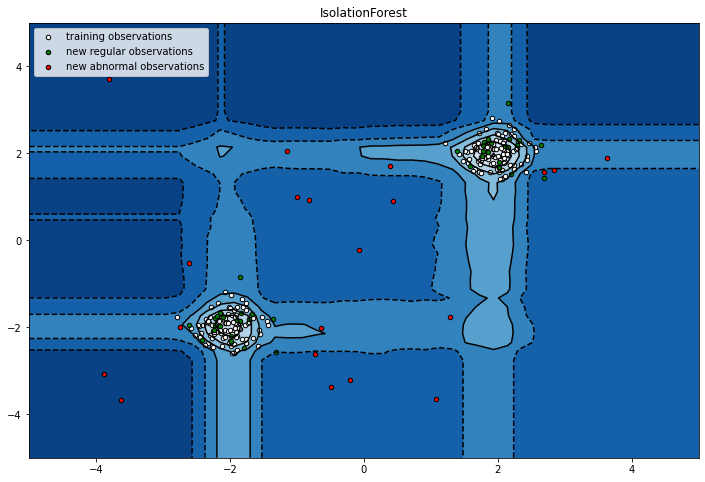

In [28]:
# plot the line, the samples, and the nearest vectors to the plane

# set up the meshgrid to plot the performance of the isolation tree
# note the use of the ravel function here on xx and yy in the meshgrid to create
# linear array versions of the grid locations

xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# set up the plot and do a contour plot of the classification behavior of the isolation forest

plt.figure(figsize=(12,8))
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, colors="k")

# now add the test, train and isolation data to the plot

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()

In [33]:
# sample sccores from the anomaly detector
# the anomaly detector computes the raw scores for each invidual, which is proportional to the length needed to isolate and then uses a boundary
# or threshold to classify each speciment

y_scores_train=clf.score_samples(X_train)
y_scores_train[0:10]

array([-0.45612928, -0.53554568, -0.42612021, -0.57801171, -0.44309399,
       -0.43455343, -0.53760548, -0.53062519, -0.45244391, -0.52490431])

(array([ 5.,  7., 12., 14., 24., 13., 31., 27., 46., 21.]),
 array([-0.628984  , -0.60803209, -0.58708017, -0.56612825, -0.54517633,
        -0.52422442, -0.5032725 , -0.48232058, -0.46136866, -0.44041675,
        -0.41946483]),
 <BarContainer object of 10 artists>)

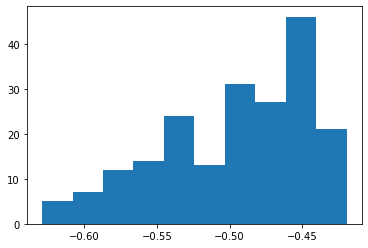

In [34]:
plt.hist(y_scores_train)

In [36]:
# can get the scores for the other sets,  X_test and X_outliers
y_scores_test=clf.score_samples(X_test)
y_scores_outliers=clf.score_samples(X_outliers)

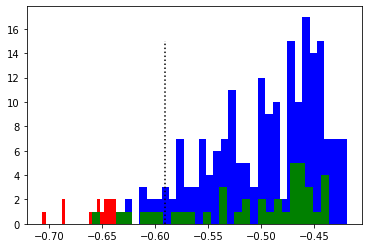

In [42]:
# plot all the histograms,  in different colors
# we can also get the "offset_" which is really a cutoff or threshold

plt.hist(y_scores_outliers,color='r',bins=30)
plt.hist(y_scores_train,color='b',bins=30)
plt.hist(y_scores_test,color='g',bins=30)

cutoff=clf.offset_
plt.plot([cutoff,cutoff],[0,15],color="k",linestyle=":")


Looking at the histogram, it looks like the cutoff level could be loweraround -0.64 or so,  which would offer better performance, in some sense of the word performance

# Question/Action

Figure out for this system what the "optimum" choice of the contamination parameter in the Isolation Forest is

What does "optimum" mean?

Figure out what metric might work to define optimum

Write a loop that would walk through the possible values of contamination to estimate what contamination value gives the optimum.  This is a form of hyperparameter 
estimation,   so you might be able to figure out how to get gridsearch to do this for you,  if you can figure out the right metric to use in gridsearch,  or create it.

Don't re-use the name "clf",  we'll use it again later